In [1]:
from sklearn import *
import pandas as pd
import numpy as np
from sklearn import tree
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

C:\Users\ASHOK\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ASHOK\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\ASHOK\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


#### Knowing Training Data

In [3]:
train_data=pd.read_csv('./Datasets/train.csv')

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#Count of Non-null entries in each column#Count o 
train_data.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [6]:
#More info about dataset - Only numercal columns
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
pd.isnull(train_data).sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
## Updating the column which is depedent variable
train_data.loc[train_data["Loan_Status"] == "Y", "Loan_Status"] = 1
train_data.loc[train_data["Loan_Status"] == "N", "Loan_Status"] = 0

In [13]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [8]:
#### There isn't any column which should be removed from the dataset

In [9]:
## Distribution of Catagorical columns

### Gender

In [10]:
train_data.groupby(['Gender']).size()

Gender
Female    112
Male      489
dtype: int64

In [ ]:
## Males are more applicants compared to woman

In [37]:
## we can safely replace Null Gender values with Males
train_data["Gender"].fillna('Male', inplace = True)

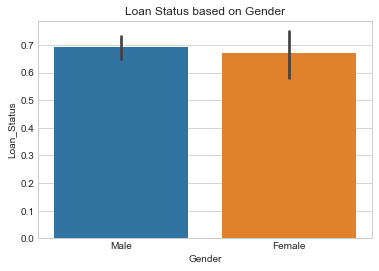

In [38]:
sns.barplot(data=train_data,x="Gender", y="Loan_Status")
plt.title("Loan Status based on Gender")
plt.show()

In [39]:
### Loan approval ratio is nearlly same ratio of Male and females; although little higher for males as they have higher applicants

In [46]:
loan_approved_females = train_data[train_data.Gender == "Female"]["Loan_Status"].sum()
loan_applied_females = train_data[train_data.Gender == "Female"]["Loan_Status"].count()
loan_approved_males = train_data[train_data.Gender == "Male"]["Loan_Status"].sum()
loan_applied_males = train_data[train_data.Gender == "Male"]["Loan_Status"].count()
total_approved= train_data["Loan_Status"].sum()
total=train_data["Loan_ID"].count()
approved_females_perc=loan_approved_females/total_approved
approved_males_perc=loan_approved_males/total_approved
f_approved_ratio=loan_approved_females/loan_applied_females
m_approved_ratio=loan_approved_males/loan_applied_males
approved_ratio=total_approved/total

In [47]:
print (approved_females_perc) , print (approved_males_perc) , print (approved_ratio), print (f_approved_ratio), print (m_approved_ratio)

0.17772511848341233
0.8222748815165877
0.6872964169381107
0.6696428571428571
0.6912350597609562


(None, None, None, None, None)

In [23]:
## Total loan aprroval has higher portions of Man compared to women

### Married

In [42]:
train_data.groupby(['Married']).size()

Married
No     213
Yes    398
dtype: int64

In [43]:
## Most applicant are Married compared, thus we can replace Nulls with married
train_data["Married"].fillna('Yes', inplace = True)

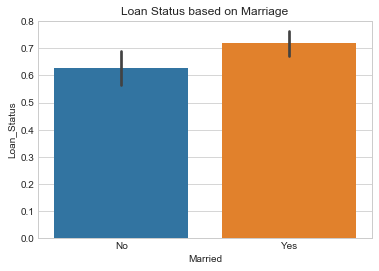

In [44]:
sns.barplot(data=train_data,x="Married", y="Loan_Status")
plt.title("Loan Status based on Marriage")
plt.show()

In [53]:
### Loan approval ratio is higher for married

In [51]:
loan_approved_married = train_data[train_data.Married == "Yes"]["Loan_Status"].sum()
loan_applied_married = train_data[train_data.Married == "Yes"]["Loan_Status"].count()
loan_approved_unmarried = train_data[train_data.Married == "No"]["Loan_Status"].sum()
loan_applied_unmarried = train_data[train_data.Married == "No"]["Loan_Status"].count()
total_approved= train_data["Loan_Status"].sum()
total=train_data["Loan_ID"].count()
approved_marriedd_perc=loan_approved_married/total_approved
approved_unmarried_perc=loan_approved_unmarried/total_approved
y_approved_ratio=loan_approved_married/loan_applied_married
n_approved_ratio=loan_approved_unmarried/loan_applied_unmarried
approved_ratio=total_approved/total

In [52]:
print (approved_marriedd_perc) , print (approved_unmarried_perc) , print (approved_ratio), print (y_approved_ratio), print (n_approved_ratio)

0.6824644549763034
0.3175355450236967
0.6872964169381107
0.7182044887780549
0.6291079812206573


(None, None, None, None, None)

In [54]:
## Total loan aprroval has higher portions of Married compared to unmarried

### Dependent

In [56]:
train_data.groupby(['Dependents']).size()

Dependents
0     345
1     102
2     101
3+     51
dtype: int64

In [59]:
### Highest applicants has no dependent

In [57]:
## Replacing Null values with Mode
train_data["Dependents"].fillna('0', inplace = True)

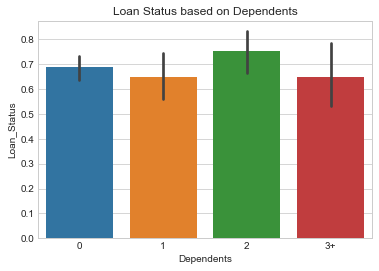

In [79]:
sns.barplot(data=train_data,x="Dependents", y="Loan_Status")
plt.title("Loan Status based on Dependents")
plt.show()

In [60]:
### Loan approval ratio is higher for 2 dependents

In [71]:
loan_approved_d0 = train_data[train_data.Dependents == "0"]["Loan_Status"].sum()
loan_approved_d1 = train_data[train_data.Dependents == "1"]["Loan_Status"].sum()
loan_approved_d2 = train_data[train_data.Dependents == "2"]["Loan_Status"].sum()
loan_approved_d3 = train_data[train_data.Dependents == "3+"]["Loan_Status"].sum()
total_approved= train_data["Loan_Status"].sum()
total=train_data["Loan_ID"].count()

In [72]:
print (total_approved/total), print (loan_approved_d0/total_approved), print (loan_approved_d1/total_approved), print (loan_approved_d2/total_approved), print (loan_approved_d3/total_approved)

0.6872964169381107
0.5853080568720379
0.15639810426540285
0.18009478672985782
0.07819905213270142


(None, None, None, None, None)

In [73]:
### Highest approvals are for Dependent zero as they are also highest applicants

### Education

In [74]:
train_data.groupby(['Education']).size()

Education
Graduate        480
Not Graduate    134
dtype: int64

In [76]:
### Highest proportion is of graduates; there is no null values here

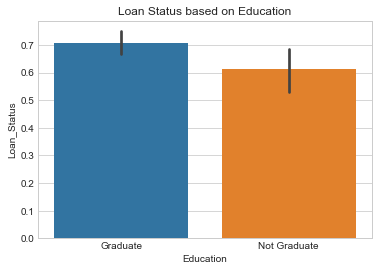

In [78]:
sns.barplot(data=train_data,x="Education", y="Loan_Status")
plt.title("Loan Status based on Education")
plt.show()

In [81]:
### Graduates has higher loan success ratio

In [85]:
loan_approved_grad = train_data[train_data.Education == "Graduate"]["Loan_Status"].sum()
loan_approved_nongrad = train_data[train_data.Education == "Not Graduate"]["Loan_Status"].sum()
total_approved= train_data["Loan_Status"].sum()
total=train_data["Loan_ID"].count()

In [86]:
print (total_approved/total), print(loan_approved_grad/total_approved), print(loan_approved_nongrad/total_approved)

0.6872964169381107
0.8056872037914692
0.1943127962085308


(None, None, None)

In [87]:
### As graduates are highest applicants thus they also has higher success ratio

### Self Employed

In [89]:
train_data.groupby(['Self_Employed']).size()

Self_Employed
No     500
Yes     82
dtype: int64

In [90]:
## Mostly are not self employed

In [91]:
train_data["Self_Employed"].fillna('No', inplace = True)